<a href="https://colab.research.google.com/github/mumtazharis/PCVK_MumtazHaris/blob/main/Week_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt

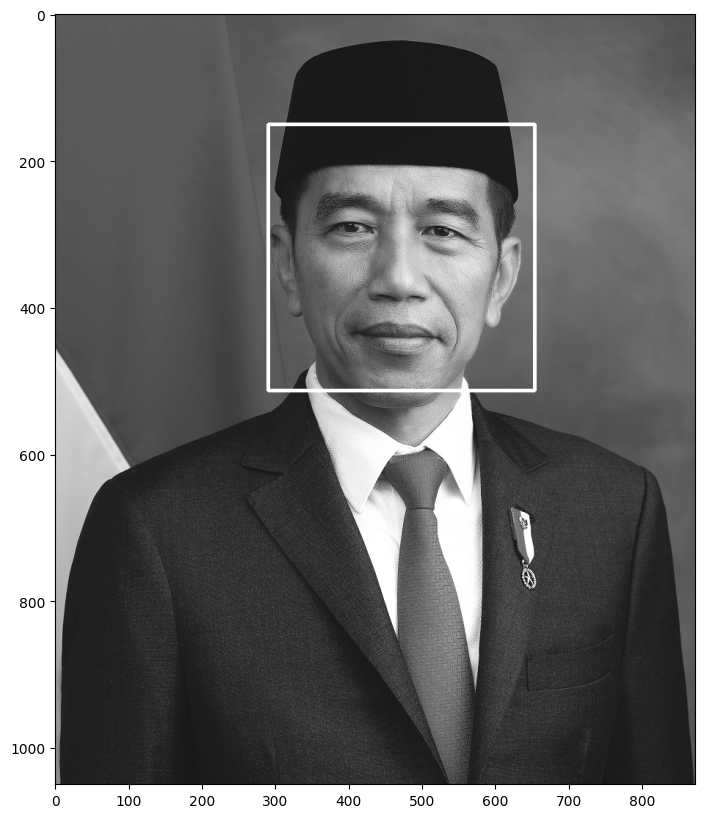

In [2]:
cascade_wajah = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
jokowi = cv2.imread('/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg', 0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for (x,y,w,h) in roi_wajah:
  cv2.rectangle (jokowi, (x,y), (x+w,y+h), (255,255,255), 3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

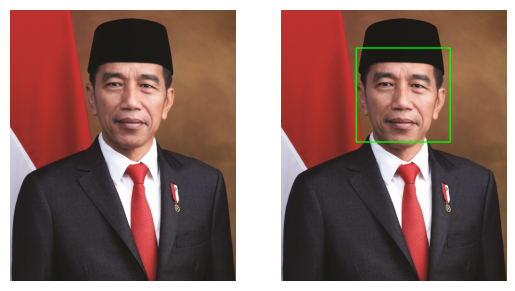

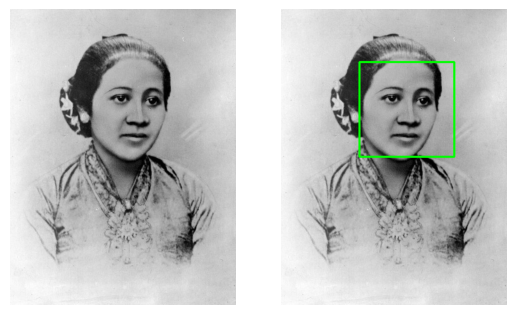

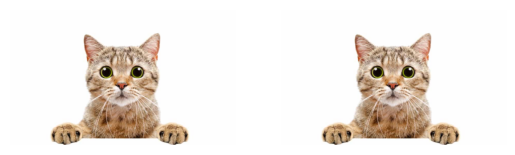

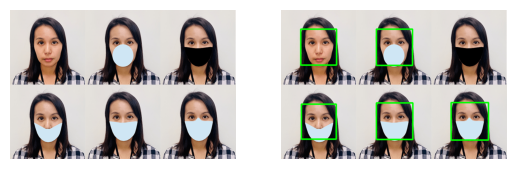

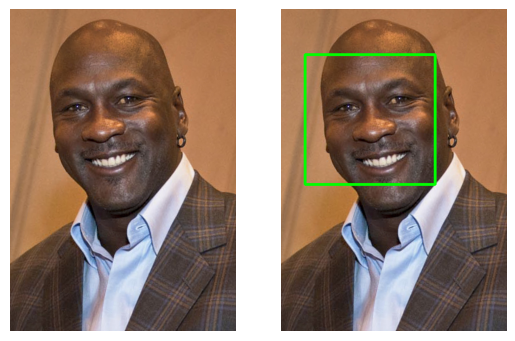

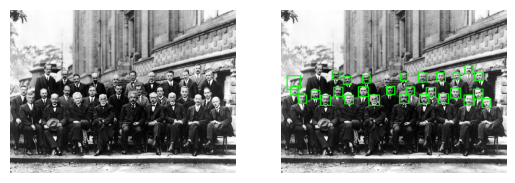

In [3]:
cascade_wajah = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
file_name = ['jokowi.jpg', 'kartini.jpg', 'kucing.jpg', 'mask.png', 'mjordan.jpg', 'solvayconf.jpg']
for i in file_name:
  path = '/content/drive/MyDrive/PCVK/Images/facedet/' + i
  img = cv2.imread(path)
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img_rgb.copy()
  roi_wajah = cascade_wajah.detectMultiScale(img_gray)
  for (x,y,w,h) in roi_wajah:
    cv2.rectangle (img_rgb, (x,y), (x+w,y+h), (0,255,0), 3)

  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(img_rgb)
  plt.axis('off')

  plt.show()

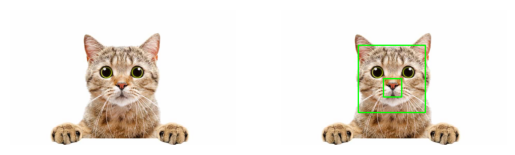

In [4]:
cascade_wajah = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalcatface_extended.xml')
kucing = cv2.imread('/content/drive/MyDrive/PCVK/Images/facedet/kucing.jpg')
kucing_gray = cv2.cvtColor(kucing, cv2.COLOR_BGR2GRAY)
kucing_rgb = cv2.cvtColor(kucing, cv2.COLOR_BGR2RGB)
kucing = kucing_rgb.copy()
roi_wajah = cascade_wajah.detectMultiScale(kucing_gray)
for (x,y,w,h) in roi_wajah:
  cv2.rectangle (kucing_rgb, (x,y), (x+w,y+h), (0,255,0), 3)

plt.subplot(1,2,1)
plt.imshow(kucing)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(kucing_rgb)
plt.axis('off')

plt.show()

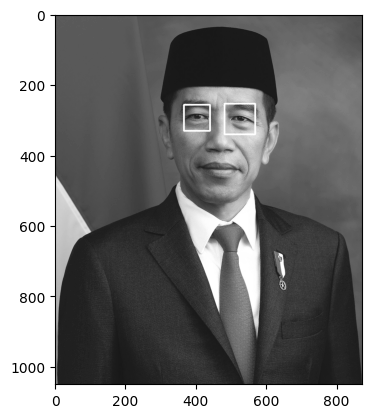

In [5]:
cascade_wajah = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
jokowi = cv2.imread('/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg', 0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for (x,y,w,h) in roi_wajah:
  cv2.rectangle (jokowi, (x,y), (x+w,y+h), (255,255,255), 3)

plt.imshow(jokowi, cmap='gray')

In [6]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np
import PIL
import io
import html
import time

In [7]:
cascade_wajah = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes


# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = cascade_wajah.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

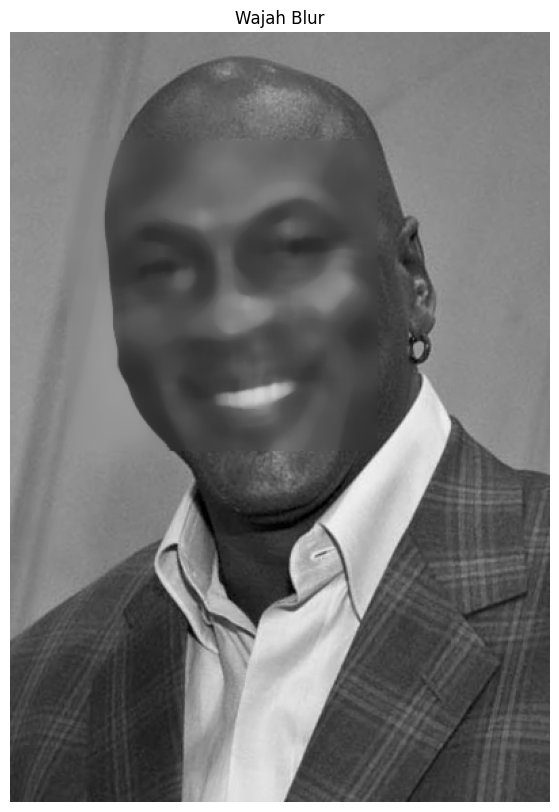

In [8]:
# Load Haar Cascade dan gambar
cascade_wajah = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
mjordan = cv2.imread('/content/drive/MyDrive/PCVK/Images/facedet/mjordan.jpg')

# Konversi gambar ke grayscale
mjordan_gray = cv2.cvtColor(mjordan, cv2.COLOR_BGR2GRAY)

# Deteksi wajah
roi_wajah = cascade_wajah.detectMultiScale(mjordan_gray, scaleFactor=1.1, minNeighbors=5)

# Blur area wajah
for (x, y, w, h) in roi_wajah:
    # Crop wajah
    wajah = mjordan_gray[y:y+h, x:x+w]

    # Terapkan median blur
    wajah_blur = cv2.medianBlur(wajah, 15)

    # Tempel kembali area yang sudah di-blur ke gambar asli
    mjordan_gray[y:y+h, x:x+w] = wajah_blur

# Tampilkan hasil
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(mjordan_gray, cv2.COLOR_BGR2RGB))  # Konversi ke RGB untuk matplotlib
plt.axis('off')
plt.title("Wajah Blur")
plt.show()


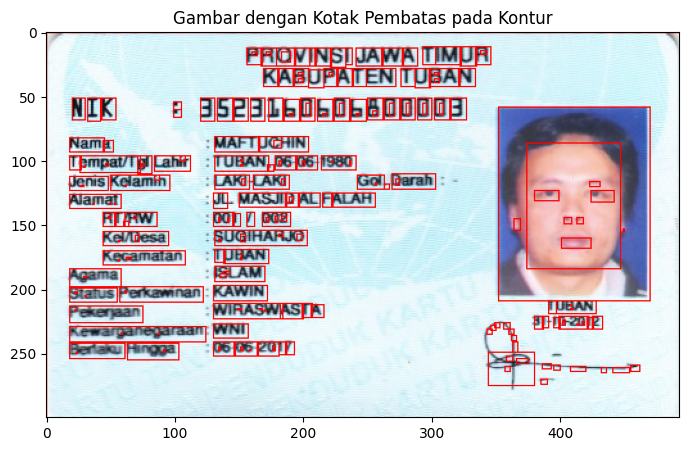

In [9]:
src = cv2.imread('/content/drive/MyDrive/PCVK/ktp3.png')

blurred = cv2.GaussianBlur(src, (3, 3), 0.5)
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((2, 2), np.uint8)  # Kernel untuk erosi, ukuran 5x5
closed_image = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
# Menemukan semua kontur pada gambar
contours, hierarchy = cv2.findContours(closed_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Menyalin gambar asli untuk menggambar kontur
img_contours = src.copy()

# Menggambar semua kontur dengan warna hijau dan ketebalan 2
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 1)

# Menyalin gambar asli untuk menggambar kotak pembatas
img_contours_bounding = src.copy()

# Looping melalui setiap kontur
for cnt in contours:
    # Menghitung bounding box untuk setiap kontur
    x, y, w, h = cv2.boundingRect(cnt)

    # Gambar kotak pembatas dengan warna merah dan ketebalan 2
    cv2.rectangle(img_contours_bounding, (x, y), (x + w, y + h), (0, 0, 255), 1)

# Menampilkan gambar dengan kotak pembatas di sekitar kontur
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(img_contours_bounding, cv2.COLOR_BGR2RGB))
plt.title('Gambar dengan Kotak Pembatas pada Kontur')
plt.show()

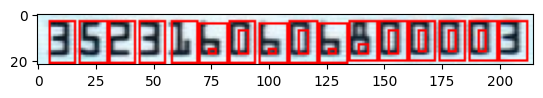

In [10]:
nik = img_contours_bounding[48:70,115:330]
nik = cv2.cvtColor(nik, cv2.COLOR_BGR2RGB)
plt.imshow(nik)

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("preatcher/standard-ocr-dataset")

print("Path to dataset files:", path)

100%|██████████| 46.2M/46.2M [00:00<00:00, 70.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/preatcher/standard-ocr-dataset/versions/2


In [112]:
import os
import tqdm
import cv2
import random
import numpy as np
import pickle

# Direktori data training
DATADIR = "/root/.cache/kagglehub/datasets/preatcher/standard-ocr-dataset/versions/2/data/training_data"
dirs = []
training_data = []
width, height = 100, 100

# Looping direktori data training untuk diambil nama karakternya (hanya folder '0' sampai '9')
for char_name in sorted(os.listdir(DATADIR)):
    if char_name.isdigit() and 0 <= int(char_name) <= 9:  # Filter folder hanya angka 0-9
        path = os.path.join(DATADIR, char_name)
        if os.path.isdir(path):  # Pastikan hanya direktori yang diproses
            dirs.append(char_name)

# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
    path = os.path.join(DATADIR, char_name)
    class_number = int(char_name)  # Gunakan angka folder sebagai label
    for img in tqdm.tqdm(os.listdir(path)):
        try:
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (width, height))
            training_data.append([new_array, class_number])
        except Exception as e:
            pass

# Shuffle data
random.shuffle(training_data)

# Pisahkan fitur dan label
X = []
Y = []
for feature, label in training_data:
    X.append(feature)
    Y.append(label)

X = np.array(X).reshape(-1, width, height, 1)

# Simpan ke file pickle
with open("X.pickle", "wb") as pickle_out:
    pickle.dump(X, pickle_out)

with open("Y.pickle", "wb") as pickle_out:
    pickle.dump(Y, pickle_out)


100%|██████████| 573/573 [00:00<00:00, 12101.76it/s]


In [113]:
import pickle
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load file pickle
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)
Y = to_categorical(Y)
X = X / 255.0
width, height = 100, 100

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(10, activation='softmax')(fc_layer)

# Optimizer
adam = Adam(learning_rate=0.0001)

# Model
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Training
model.fit(X, Y, epochs=20, verbose=1)

# Save model
model.save('anpr.model.keras')


Epoch 1/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6327 - loss: 1.2264
Epoch 2/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9771 - loss: 0.0817
Epoch 3/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9833 - loss: 0.0562
Epoch 4/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9923 - loss: 0.0298
Epoch 5/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9923 - loss: 0.0273
Epoch 6/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9971 - loss: 0.0116
Epoch 7/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9982 - loss: 0.0081
Epoch 8/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9989 - loss: 0.0042
Epoch 9/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 0.0021
Epoch 10/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9992 - loss: 0.0025
Epoch 11/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9999 - loss: 0.0017
Epoch 12/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9m

In [114]:

# Path ke Google Drive untuk menyimpan model
drive_path = "/content/drive/MyDrive/PCVK/anpr_model.keras"

# Simpan model ke Google Drive
model.save(drive_path)

print(f"Model berhasil disimpan ke {drive_path}")

Model berhasil disimpan ke /content/drive/MyDrive/PCVK/anpr_model.keras


In [115]:
import os
import cv2
import tensorflow as tf
import numpy as np

# Direktori dataset
data_dir_training = "/root/.cache/kagglehub/datasets/preatcher/standard-ocr-dataset/versions/2/data/training_data"
data_dir_testing = "/root/.cache/kagglehub/datasets/preatcher/standard-ocr-dataset/versions/2/data/testing_data"

# Dimensi input gambar
width, height = 100, 100

# Load model
model = tf.keras.models.load_model("/content/drive/MyDrive/PCVK/anpr_model.keras")

# Ambil nama karakter dari direktori training (hanya folder bernama 0-9)
dirs = []
for char_name in sorted(os.listdir(data_dir_training)):
    if char_name.isdigit() and 0 <= int(char_name) <= 9:  # Filter nama folder 0-9
        path = os.path.join(data_dir_training, char_name)
        if os.path.isdir(path):
            dirs.append(char_name)

# Looping folder di direktori testing (hanya folder bernama 0-9)
for car in sorted(os.listdir(data_dir_testing)):
    if car.isdigit() and 0 <= int(car) <= 9:  # Filter nama folder 0-9
        temp = ""  # Untuk menyimpan hasil prediksi
        folder_path = os.path.join(data_dir_testing, car)

        if os.path.isdir(folder_path):  # Pastikan hanya folder yang diproses
            for char_img in sorted(os.listdir(folder_path)):
                try:
                    # Baca dan preprocessing gambar
                    img_path = os.path.join(folder_path, char_img)
                    img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Pastikan grayscale
                    new_array = cv2.resize(img_array, (width, height))  # Resize gambar
                    new_array = new_array / 255.0  # Normalisasi
                    new_array = np.expand_dims(new_array, axis=-1)  # Tambah channel (1)
                    new_array = np.expand_dims(new_array, axis=0)  # Tambah batch size (1)

                    # Prediksi
                    prediction = model.predict(new_array, verbose=0)  # verbose=0 untuk suppress output
                    predicted_char = dirs[np.argmax(prediction[0])]  # Ambil label berdasarkan indeks
                    temp += predicted_char
                except Exception as e:
                    print(f"Error processing image {char_img}: {e}")

        print(f"Folder name: {car} | Predicted number: {temp}")


Folder name: 0 | Predicted number: 0000000000000000000000000000
Folder name: 1 | Predicted number: 1111111111111111111111111111
Folder name: 2 | Predicted number: 2222222222222222222222222222
Folder name: 3 | Predicted number: 3333333333333333333333333333
Folder name: 4 | Predicted number: 4444444444444444444444444444
Folder name: 5 | Predicted number: 5555555555555555555555555555
Folder name: 6 | Predicted number: 6666666666666666666666666666
Folder name: 7 | Predicted number: 7777777777777777777777777777
Folder name: 8 | Predicted number: 8888888888888888888888888888
Folder name: 9 | Predicted number: 9999999999999999999999999999


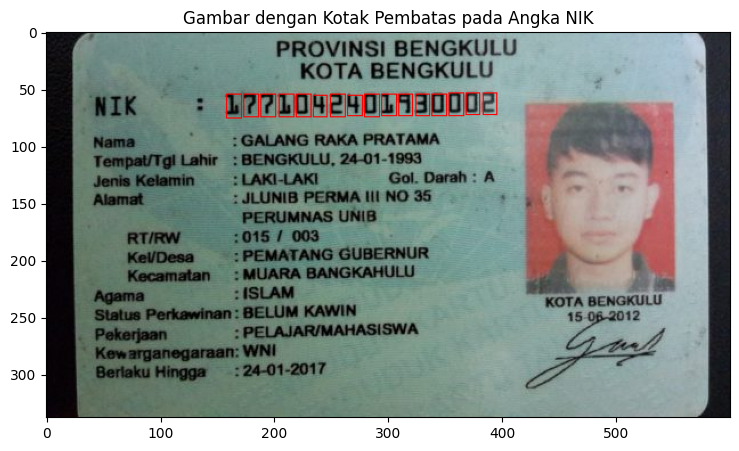

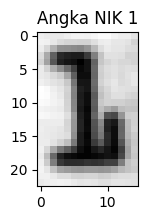

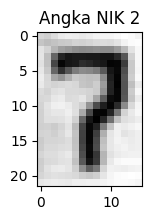

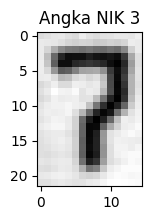

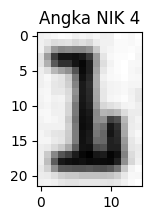

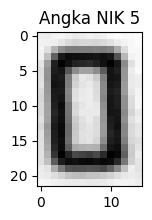

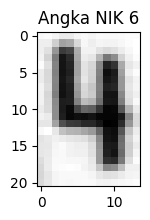

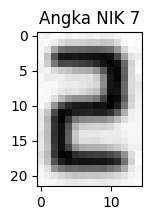

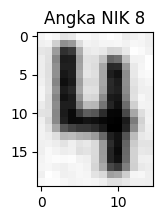

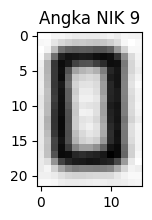

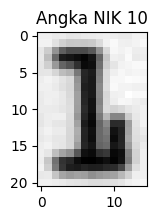

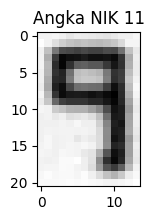

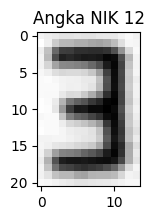

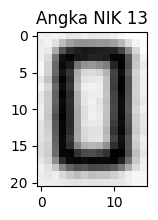

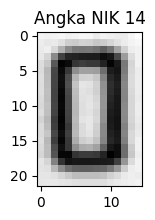

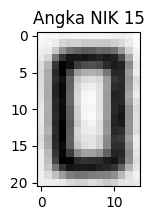

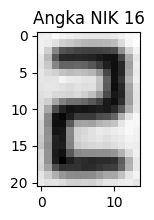

In [116]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
src = cv2.imread('/content/drive/MyDrive/PCVK/ktp1.png')

# Proses Preprocessing: Gaussian blur dan konversi ke grayscale
blurred = cv2.GaussianBlur(src, (3, 3), 0.5)
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Thresholding untuk konversi gambar menjadi biner
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Erosi untuk menghapus noise
kernel = np.ones((2, 2), np.uint8)
closed_image = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)

# Menemukan semua kontur pada gambar
contours, hierarchy = cv2.findContours(closed_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Menyalin gambar asli untuk menggambar kontur
img_contours = src.copy()

# Menggambar semua kontur pada gambar (untuk visualisasi)
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 1)

# Menyalin gambar untuk menggambar kotak pembatas di sekitar kontur angka
img_contours_bounding = src.copy()

# List untuk menyimpan posisi angka yang dikenali
nik_digits = []

# Koordinat batas area yang ingin dideteksi
x_min, y_min = 150, 50
x_max, y_max = 400, 80

# Urutkan kontur berdasarkan posisi x (dari kiri ke kanan)
contours_sorted = sorted(contours, key=lambda cnt: cv2.boundingRect(cnt)[0])

# Looping melalui setiap kontur untuk mendeteksi angka NIK
for cnt in contours_sorted:
    # Menghitung bounding box untuk setiap kontur
    x, y, w, h = cv2.boundingRect(cnt)
    if (x >= x_min and y >= y_min and x + w <= x_max and y + h <= y_max):
        # Filter kontur berdasarkan panjang dan lebar minimal (sesuaikan dengan ukuran angka NIK)
        if 10 < w < 20 and 15 < h < 22:  # Filter panjang (w) dan lebar (h) sesuai dengan ukuran angka NIK
            # Gambar kotak pembatas dengan warna merah dan ketebalan 2
            cv2.rectangle(img_contours_bounding, (x, y), (x + w, y + h), (0, 0, 255), 1)

            # Potong bagian gambar yang mengandung angka
            digit_image = gray[y-2:y + h, x-2:x + w]

            # Simpan gambar potongan untuk pengenalan angka nanti (misalnya, dengan Tesseract OCR atau model CNN)
            nik_digits.append(digit_image)

# Menampilkan gambar dengan kotak pembatas di sekitar angka yang terdeteksi
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(img_contours_bounding, cv2.COLOR_BGR2RGB))
plt.title('Gambar dengan Kotak Pembatas pada Angka NIK')
plt.show()

# Menampilkan semua gambar potongan angka yang terdeteksi (misalnya, menggunakan Tesseract atau model lain untuk mengenali)
for i, digit_image in enumerate(nik_digits):
    plt.figure(figsize=(2, 2))
    plt.imshow(digit_image, cmap='gray')
    plt.title(f"Angka NIK {i + 1}")
    plt.show()


In [117]:
data_dir_training = "/root/.cache/kagglehub/datasets/preatcher/standard-ocr-dataset/versions/2/data/training_data"
# Ambil nama karakter dari direktori training
dirs = []
for char_name in sorted(os.listdir(data_dir_training)):
    if os.path.isdir(os.path.join(data_dir_training, char_name)):
        dirs.append(char_name)

# Load model
model = tf.keras.models.load_model("/content/drive/MyDrive/PCVK/anpr_model.keras")

# Loop untuk melakukan prediksi pada setiap gambar potongan NIK
temp_nik = ""
# Proses prediksi untuk setiap gambar potongan NIK
for i, image in enumerate(nik_digits):
    # Ubah ukuran gambar menjadi 100x100
    image_resized = cv2.resize(image, (100, 100))  # Resize gambar
    # Normalisasi gambar (mengubah nilai pixel ke range [0, 1])
    image_normalized = image_resized / 255.0  # Normalisasi ke rentang [0, 1]

    image_batch = np.expand_dims(image_normalized, axis=-1)
    image_batch = np.expand_dims(image_batch, axis=0)

    # Prediksi karakter pada gambar
    prediction = model.predict(image_batch, verbose=0)
    # Ambil karakter yang diprediksi (mengambil nilai tertinggi dari output softmax)
    predicted_char = dirs[np.argmax(prediction[0])]  # Prediksi karakter yang memiliki probabilitas tertinggi

    # Gabungkan prediksi menjadi satu string NIK
    temp_nik += str(predicted_char)  # Menambahkan hasil prediksi ke temp_nik

    # Optional: Menampilkan hasil prediksi untuk setiap gambar
    print(f"Prediksi untuk gambar {i + 1}: {predicted_char}")

# Menampilkan hasil akhir NIK
print(f"Prediksi NIK: {temp_nik}")


Prediksi untuk gambar 1: 1
Prediksi untuk gambar 2: 7
Prediksi untuk gambar 3: 7
Prediksi untuk gambar 4: 1
Prediksi untuk gambar 5: 0
Prediksi untuk gambar 6: 9
Prediksi untuk gambar 7: 2
Prediksi untuk gambar 8: 4
Prediksi untuk gambar 9: 0
Prediksi untuk gambar 10: 1
Prediksi untuk gambar 11: 5
Prediksi untuk gambar 12: 3
Prediksi untuk gambar 13: 0
Prediksi untuk gambar 14: 0
Prediksi untuk gambar 15: 0
Prediksi untuk gambar 16: 2
Prediksi NIK: 1771092401530002
